In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
pip install HTMLParser

  Created wheel for HTMLParser: filename=HTMLParser-0.0.2-py3-none-any.whl size=5983 sha256=d544ab0838e0619b9b0eb99901473a4bc705c55e2d00b971913df1ab865dc85b
  Stored in directory: /root/.cache/pip/wheels/88/0f/43/11747d95b28379b346c15f935f4d4075e7a4ec068d3a510c79
Successfully built HTMLParser


In [10]:
import json

path = "/content/drive/My Drive/5001_Group/"
js = open(path + "Sarcasm_Headlines_Dataset.json")
dataset = []
for line in js.readlines():
  js_line = json.loads(line)
  dataset.append(js_line)

In [19]:
headlines = []
labels = []
for item in dataset:
  headlines.append(item["headline"])
  labels.append(int(item["is_sarcastic"]))

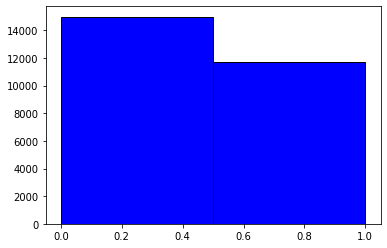

[14985, 11724]


In [21]:
import matplotlib
from matplotlib import pyplot as plt
plt.hist(labels, bins=2, facecolor="blue", edgecolor="black")
plt.show()

class_num = [0,0]
for i in labels:
  class_num[int(i)] = class_num[int(i)] + 1
print(class_num)

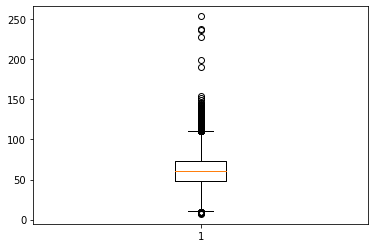

In [22]:
# show distribution of sentence length
len_list = []
for i in headlines:
  len_list.append(len(i))
plt.boxplot(len_list)
plt.show()

In [25]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
tokenizer = nltk.RegexpTokenizer(r'w+')
stemmer = PorterStemmer()

headlines_clean = []
for i in range(len(headlines)):
  tmp = headlines[i]
  tmp = re.sub("@\S+", " ", tmp)
  tmp = re.sub("https*\S+", " ", tmp)
  tmp = re.sub("#\S+", " ", tmp)
  tmp = re.sub("\'\w+", '', tmp)
  tmp = re.sub('[%s]' % re.escape(string.punctuation), ' ', tmp)
  tmp = re.sub(r'\w*\d+\w*', '', tmp)
  tmp = re.sub('\s{2,}', " ", tmp)
  words = tmp.split(" ")
  new_words = []
  for word in words:
    if word not in stop_words:
      if len(word) > 0:
        new_words.append(stemmer.stem(word))
  headlines_clean.append(' '.join(new_words).lower())

print(headlines_clean[:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['former versac store clerk sue secret code minor shopper', 'reviv catch thorni polit mood better wors', 'mom start fear son web seri closest thing grandchild', 'boehner want wife listen come altern debt reduct idea', 'j k rowl wish snape happi birthday magic way', 'advanc world women', 'fascin case eat lab grown meat', 'ceo send kid school work compani', 'top snake handler leav sink huckabe campaign', 'friday morn email insid trump presser age']


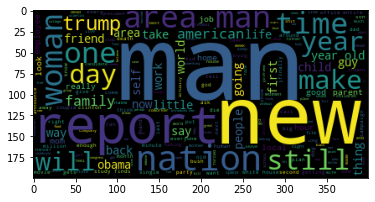

In [28]:
from wordcloud import WordCloud

headlines_pos = []
headlines_neg = []

for i in range(len(headlines)):
  if labels[i] == 0:
    headlines_pos.append(headlines[i])
  else:
    headlines_neg.append(headlines[i])


str_pos = ' '.join(headlines_pos)
str_neg = ' '.join(headlines_neg)

wc_pos = WordCloud().generate(str_pos)
wc_pos.to_file("wc_pos.png")
wc_neg = WordCloud().generate(str_neg)
wc_neg.to_file("wc_neg.png")

# plt.imshow(wc_pos)
plt.imshow(wc_neg)

[('the', {'pos': 4592, 'neg': 584, 'total': 5176}), ('in', {'pos': 2417, 'neg': 1753, 'total': 4170}), ('for', {'pos': 1881, 'neg': 1416, 'total': 3297}), ('a', {'pos': 2443, 'neg': 518, 'total': 2961}), ('on', {'pos': 1318, 'neg': 1053, 'total': 2371}), ('and', {'pos': 1630, 'neg': 254, 'total': 1884}), ('with', {'pos': 943, 'neg': 854, 'total': 1797}), ('is', {'pos': 1494, 'neg': 172, 'total': 1666}), ('new', {'pos': 664, 'neg': 821, 'total': 1485}), ('man', {'pos': 208, 'neg': 1021, 'total': 1229})]
[('in', {'pos': 2417, 'neg': 1753, 'total': 4170}), ('for', {'pos': 1881, 'neg': 1416, 'total': 3297}), ('on', {'pos': 1318, 'neg': 1053, 'total': 2371}), ('man', {'pos': 208, 'neg': 1021, 'total': 1229}), ('with', {'pos': 943, 'neg': 854, 'total': 1797}), ('new', {'pos': 664, 'neg': 821, 'total': 1485}), ('the', {'pos': 4592, 'neg': 584, 'total': 5176}), ('by', {'pos': 305, 'neg': 580, 'total': 885}), ('from', {'pos': 661, 'neg': 560, 'total': 1221}), ('at', {'pos': 644, 'neg': 545, 'to

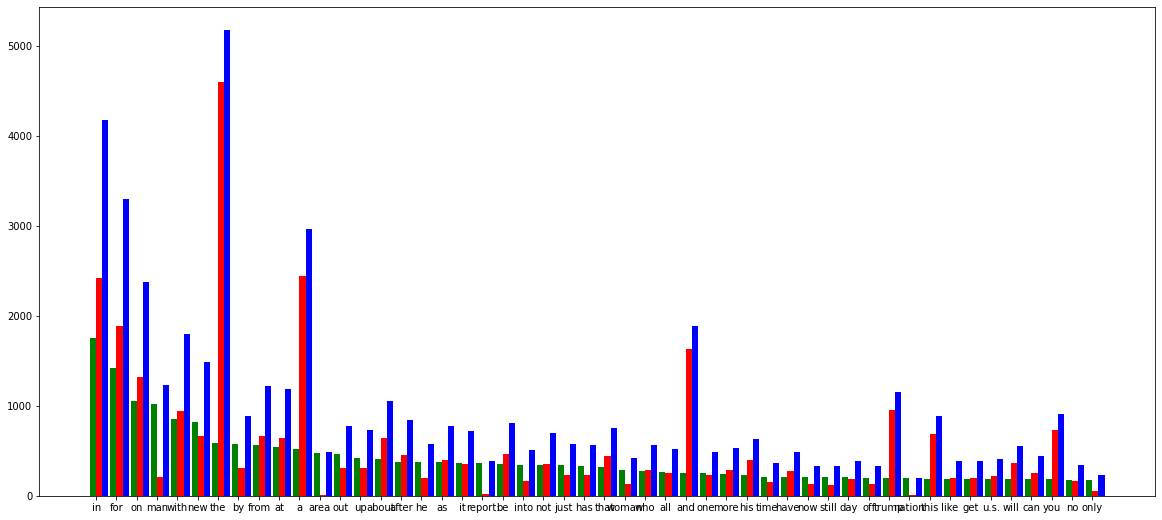

In [30]:
word_count = {}
for hd in headlines_pos:
  words = hd.split(" ")
  for word in words:
    if word not in word_count:
      word_count[word] = {"pos":0, "neg":0, "total":0}
    word_count[word]["pos"] = word_count[word]["pos"] + 1
    word_count[word]["total"] = word_count[word]["total"] + 1
for hd in headlines_neg:
  words = hd.split(" ")
  for word in words:
    if word not in word_count:
      word_count[word] = {"pos":0, "neg":0, "total":0}
    word_count[word]["neg"] = word_count[word]["neg"] + 1
    word_count[word]["total"] = word_count[word]["total"] + 1

sorted_word_count = sorted(word_count.items(), key = lambda x:x[1]["total"],reverse=True)
sorted_word_count = sorted_word_count[2:]
print(sorted_word_count[:10])

sorted_word_count_top50 = sorted(word_count.items(), key = lambda x:x[1]["neg"],reverse=True)
sorted_word_count_top50 = sorted_word_count_top50[2:]
print(sorted_word_count_top50[:10])

import numpy as np

neg_top50 = sorted_word_count_top50[:50]

top50_neg = []
top50_pos = []
top50_total = []
top50_words = []

for item in neg_top50:
  top50_neg.append(item[1]["neg"])
  top50_pos.append(item[1]["pos"])
  top50_total.append(item[1]["total"])
  top50_words.append(item[0])

width = 0.3 
x = np.arange(len(top50_words)) 

plt.figure(figsize=(20,9))
plt.bar(x,top50_neg,width=width,label=u'negative',fc="g")
plt.bar(x + width,top50_pos,width=width,label=u'positive',fc="r")
plt.bar(x + width * 2,top50_total,width=width,label=u'total',fc="b")
plt.xticks(x + width / 2, top50_words)

plt.show()